# Random Forest From First Principles

## Lý thuyết

Thuật toán Random Forest kết hợp nhiều cây quyết định lại với nhau, tạo thành một “khu rừng” các cây, vì vậy mới có tên là Random Forest.

>nhiều Decision Tree + bỏ phiếu

Dễ dùng vì có thể xử lý tốt:

- Dữ liệu phi tuyến

- nhiều feature

- feature không chuẩn hóa (không cần scale)

- Ít bị overfitting hơn Decision Tree đơn lẻ

Ở giai đoạn thứ nhất,  chọn ngẫu nhiên “k” đặc trưng từ tổng số m đặc trưng và xây dựng Random Forest. Ở giai đoạn này,  tiến hành như sau:

1. Chọn ngẫu nhiên k đặc trưng từ tổng m đặc trưng, trong đó k < m.

2. Trong số k đặc trưng đó, tính toán nút (node) d bằng cách sử dụng điểm chia (split point) tốt nhất.

3. Chia nút đó thành các nút con (daughter nodes) bằng điểm chia tốt nhất.

4. Lặp lại các bước từ 1 đến 3 cho đến khi đạt được l số lượng nút.

5. Xây dựng khu rừng bằng cách lặp lại các bước từ 1 đến 4 trong n lần để tạo ra n cây.

Ở giai đoạn thứ hai,  đưa ra dự đoán bằng Random Forest đã được huấn luyện.

1.  Lấy các đặc trưng của tập kiểm tra và sử dụng các quy tắc của từng cây quyết định được tạo ngẫu nhiên để dự đoán kết quả và lưu lại các kết quả dự đoán đó.

2. Sau đó,  tính số phiếu cho mỗi nhãn dự đoán.

3. Cuối cùng, nhãn được dự đoán có số phiếu cao nhất sẽ được chọn làm kết quả dự đoán cuối cùng của thuật toán Random Forest.

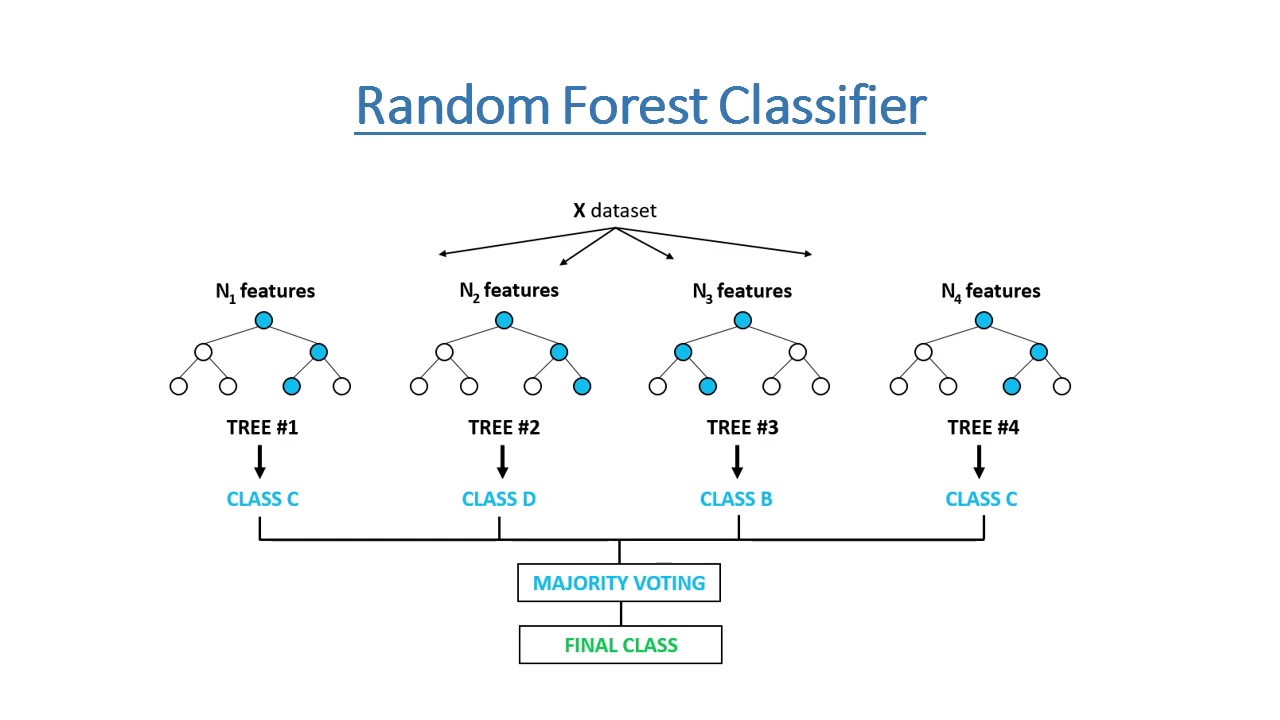

### Ưu và nhược điểm

Các ưu điểm của thuật toán Random Forest như sau:

1. Thuật toán Random Forest có thể được sử dụng để giải quyết cả bài toán phân loại (classification) và hồi quy (regression).

2. Nó được xem là một mô hình rất chính xác và mạnh mẽ (robust) vì sử dụng số lượng lớn các cây quyết định để đưa ra dự đoán.

3. Random Forest lấy trung bình tất cả các dự đoán được tạo ra bởi các cây quyết định, điều này giúp triệt tiêu các độ lệch (bias). Do đó, nó không gặp vấn đề overfitting.

4. Random Forest classifier có thể xử lý các giá trị bị thiếu (missing values). Có hai cách để xử lý các giá trị bị thiếu. Cách thứ nhất là sử dụng giá trị trung vị (median) để thay thế cho các biến liên tục và cách thứ hai là tính trung bình có trọng số dựa trên độ gần (proximity-weighted average) của các giá trị bị thiếu.

> Vẫn nên tự xử lý missing value trước

5. Random Forest classifier có thể được sử dụng để chọn lọc đặc trưng (feature selection). Điều này có nghĩa là chọn ra các đặc trưng quan trọng nhất từ tập dữ liệu huấn luyện.

> Chọn ra feature quan trọng, bỏ feature kém quan trọng. Mục tiêu:
giảm nhiễu,
giảm overfitting,
giảm thời gian train,

Các nhược điểm của thuật toán Random Forest được liệt kê dưới đây:

1. Nhược điểm lớn nhất của Random Forest là độ phức tạp tính toán. Random Forest rất chậm trong việc đưa ra dự đoán vì sử dụng số lượng lớn các cây quyết định. Tất cả các cây trong rừng đều phải đưa ra dự đoán cho cùng một đầu vào rồi sau đó mới thực hiện bỏ phiếu. Do đó, đây là một quá trình tốn thời gian.

2. Mô hình này khó giải thích hơn so với cây quyết định, vì với cây quyết định thì chúng ta có thể dễ dàng theo dõi và hiểu được quá trình đưa ra dự đoán.

## Thực hành

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'car_evaluation.csv'
df = pd.read_csv(data)

### EDA

In [3]:
df.shape

(1727, 7)

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
# for col in col_names:
#     print(df[col].value_counts())

#### Cột class

In [9]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


#### Dữ liệu thiếu

In [10]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


### Chia dữ liệu

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

### Trích lọc đặc trưng

In [15]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


#### Encode cột phân loại

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [17]:
# !pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.9 MB/s eta 0:00:00


In [19]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [21]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


### Huấn luyện

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


#### n_estimators = 100

In [23]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


> không khác là mấy

### Tìm đặc trưng quan trọng

In [24]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.291657
persons,0.235380
buying,0.160692
maint,0.134143
lug_boot,0.111595
doors,0.066533


> `safety` là qua trọng nhất còn `doors` thì ngược lại

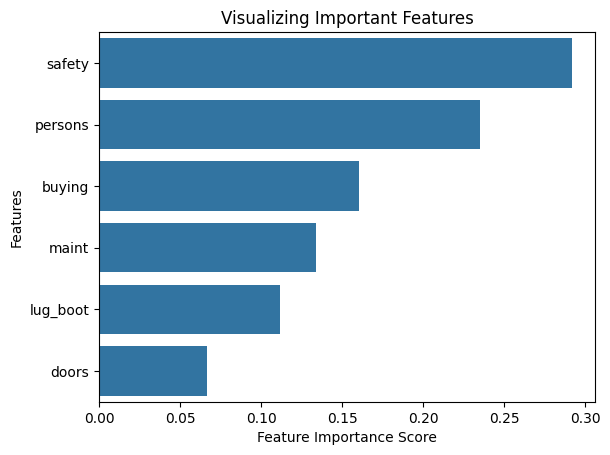

In [26]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Chọn lại đặc trưng và train

In [43]:
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [45]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [46]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


> sau khi loại bỏ `doors` thì độ chỉnh xác giảm => nên giữ lại

### Ma trận nhầm lẫn

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



## Kết luận

Xây dựng một mô hình Random Forest Classifier để dự đoán mức độ an toàn của xe hơi (một mô hình với 10 cây quyết định và một mô hình khác với 100 cây quyết định).

sử dụng mô hình Random Forest để tìm ra các đặc trưng quan trọng, sau đó xây dựng lại mô hình chỉ với các đặc trưng này và quan sát ảnh hưởng của chúng tới độ chính xác. Đặc trưng quan trọng nhất là safety và đặc trưng ít quan trọng nhất là doors.

Đã loại bỏ biến doors khỏi mô hình, xây dựng lại mô hình và kiểm tra độ chính xác. Độ chính xác của mô hình sau khi loại bỏ biến doors là 0.9263, trong khi độ chính xác của mô hình sử dụng tất cả các biến là 0.9649. Như vậy, có thể thấy độ chính xác của mô hình đã được không cải thiện khi loại bỏ biến `doors`, vì vậy tôi sẽ không loại bỏ biến này khỏi mô hình.

Ma trận nhầm lẫn (confusion matrix) và báo cáo phân loại (classification report) là các công cụ khác để trực quan hóa hiệu năng của mô hình. Các công cụ này cho thấy mô hình đạt hiệu năng tốt.

---


---

---